## Solar energy 
**Relevant concepts:**
* BeautifulSoup
* read_html
* df.join
* df.groupby, df.aggregate

Use the [UN data portal](http://data.un.org) to download datasets on [Worldwide sunshine](http://data.un.org/Data.aspx?q=Korea&d=CLINO&f=ElementCode%3A15%3BCountryCode%3AKO), [solar electricity production](http://data.un.org/Data.aspx?d=EDATA&f=cmID%3AES) and [total Electricity production](http://data.un.org/Data.aspx?d=EDATA&f=cmID%3AEC).

Compute
1. Year-by-year change in Solar electricity output by country. 
2. How do sunshine and fractional share of solar in total electricity output correlate? 

## Beijing PM2.5 
**Relevant concepts:**
* integer based/label based slicing
* df.groupby

Read the [Beijing PM2.5 Data Data Set](http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data). Plot:

1. Average pm2.5 count at each month. Plot separate curves for each year. 
2. Plot the correlation between pm2.5 and temperature. 

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
%matplotlib inline
from importlib import reload
reload(plt)

<module 'matplotlib.pyplot' from '/home/dmanik/projects/mpi/pyd3t/.devenv34/lib/python3.4/site-packages/matplotlib/pyplot.py'>

In [13]:
import pandas as pd
from io import StringIO
from urllib import request

In [14]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv'
response = request.urlopen(url)
dat = response.read()
st = dat.decode('utf-8')

In [15]:
df = pd.read_csv(StringIO(st))

In [102]:
pm = df.copy()
pm.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [103]:
pm = pm[['year', 'month', 'day', 'pm2.5']]
pm = pm[pd.notnull(pm['pm2.5'])]

In [77]:
fg = x

In [95]:
gh = pm.groupby(['year', 'month', 'day']).aggregate('mean').loc(axis=0)[:,:,:30].reset_index()
gh = gh[pd.notnull(gh['pm2.5'])]

(1, 12)

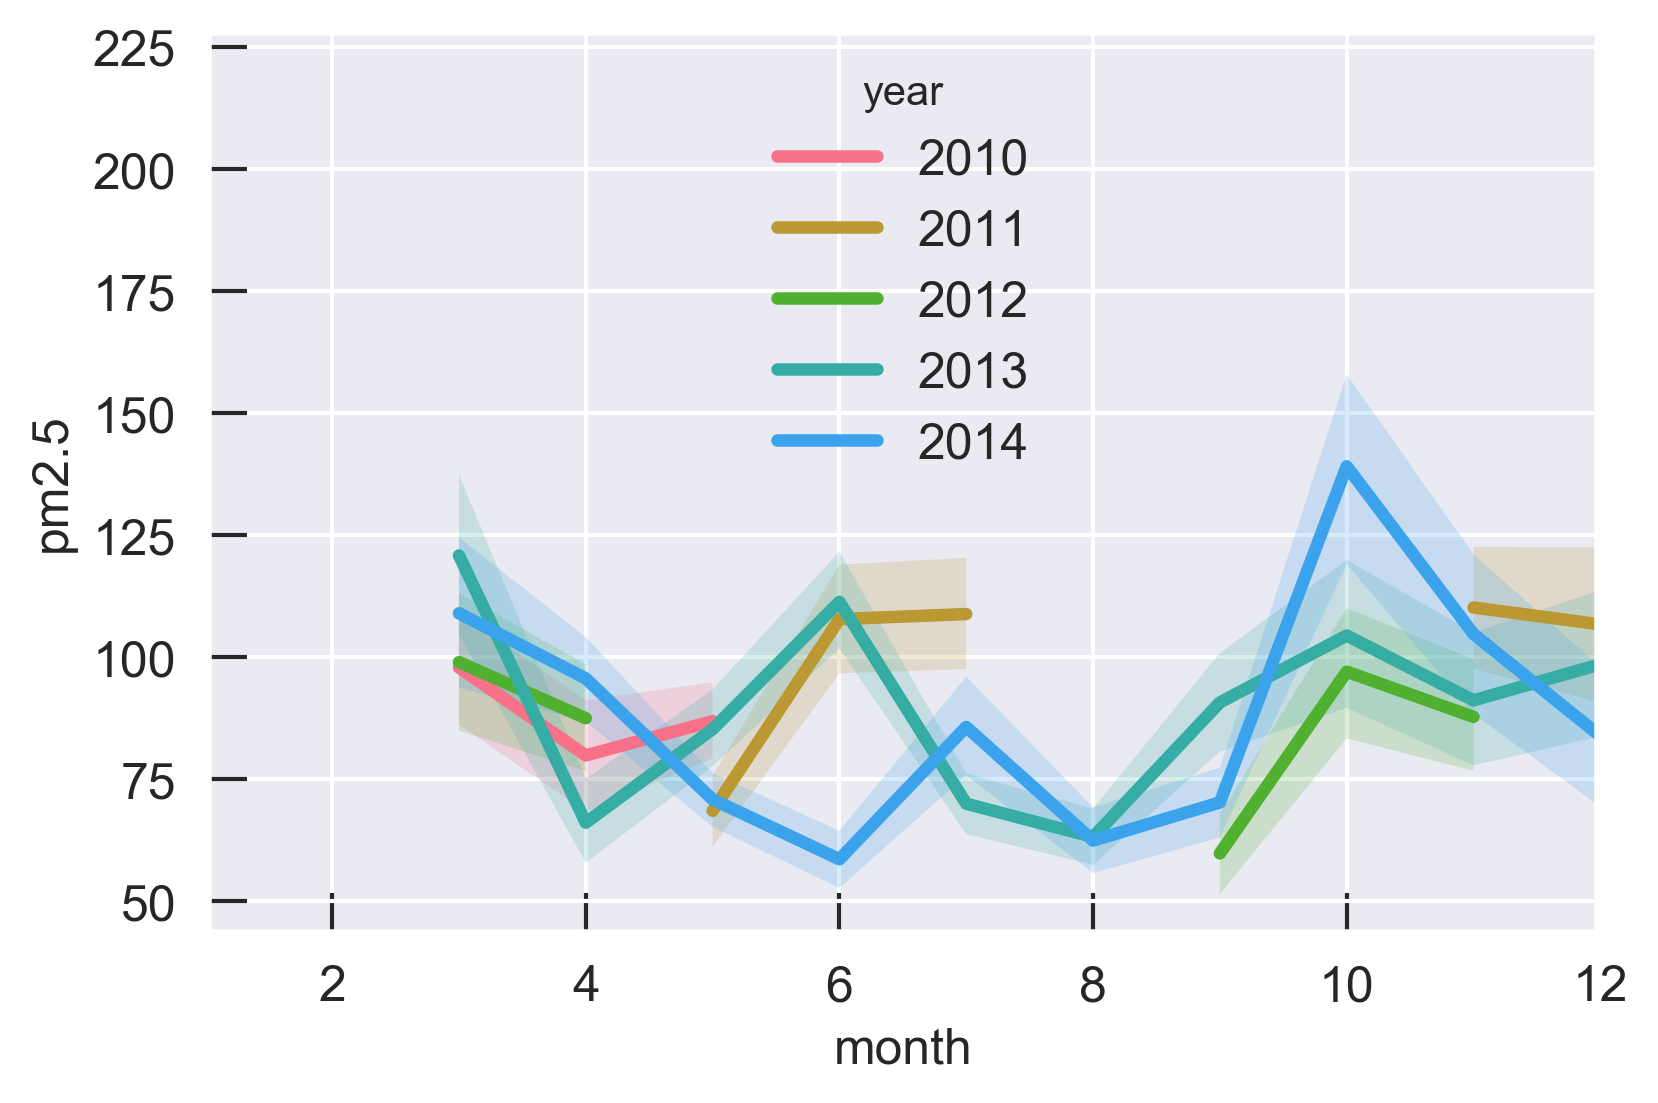

In [106]:
ax = sns.tsplot(gh, time = 'month', unit = 'day', condition= 'year', value = 'pm2.5')
ax.set_xlim(1,12)

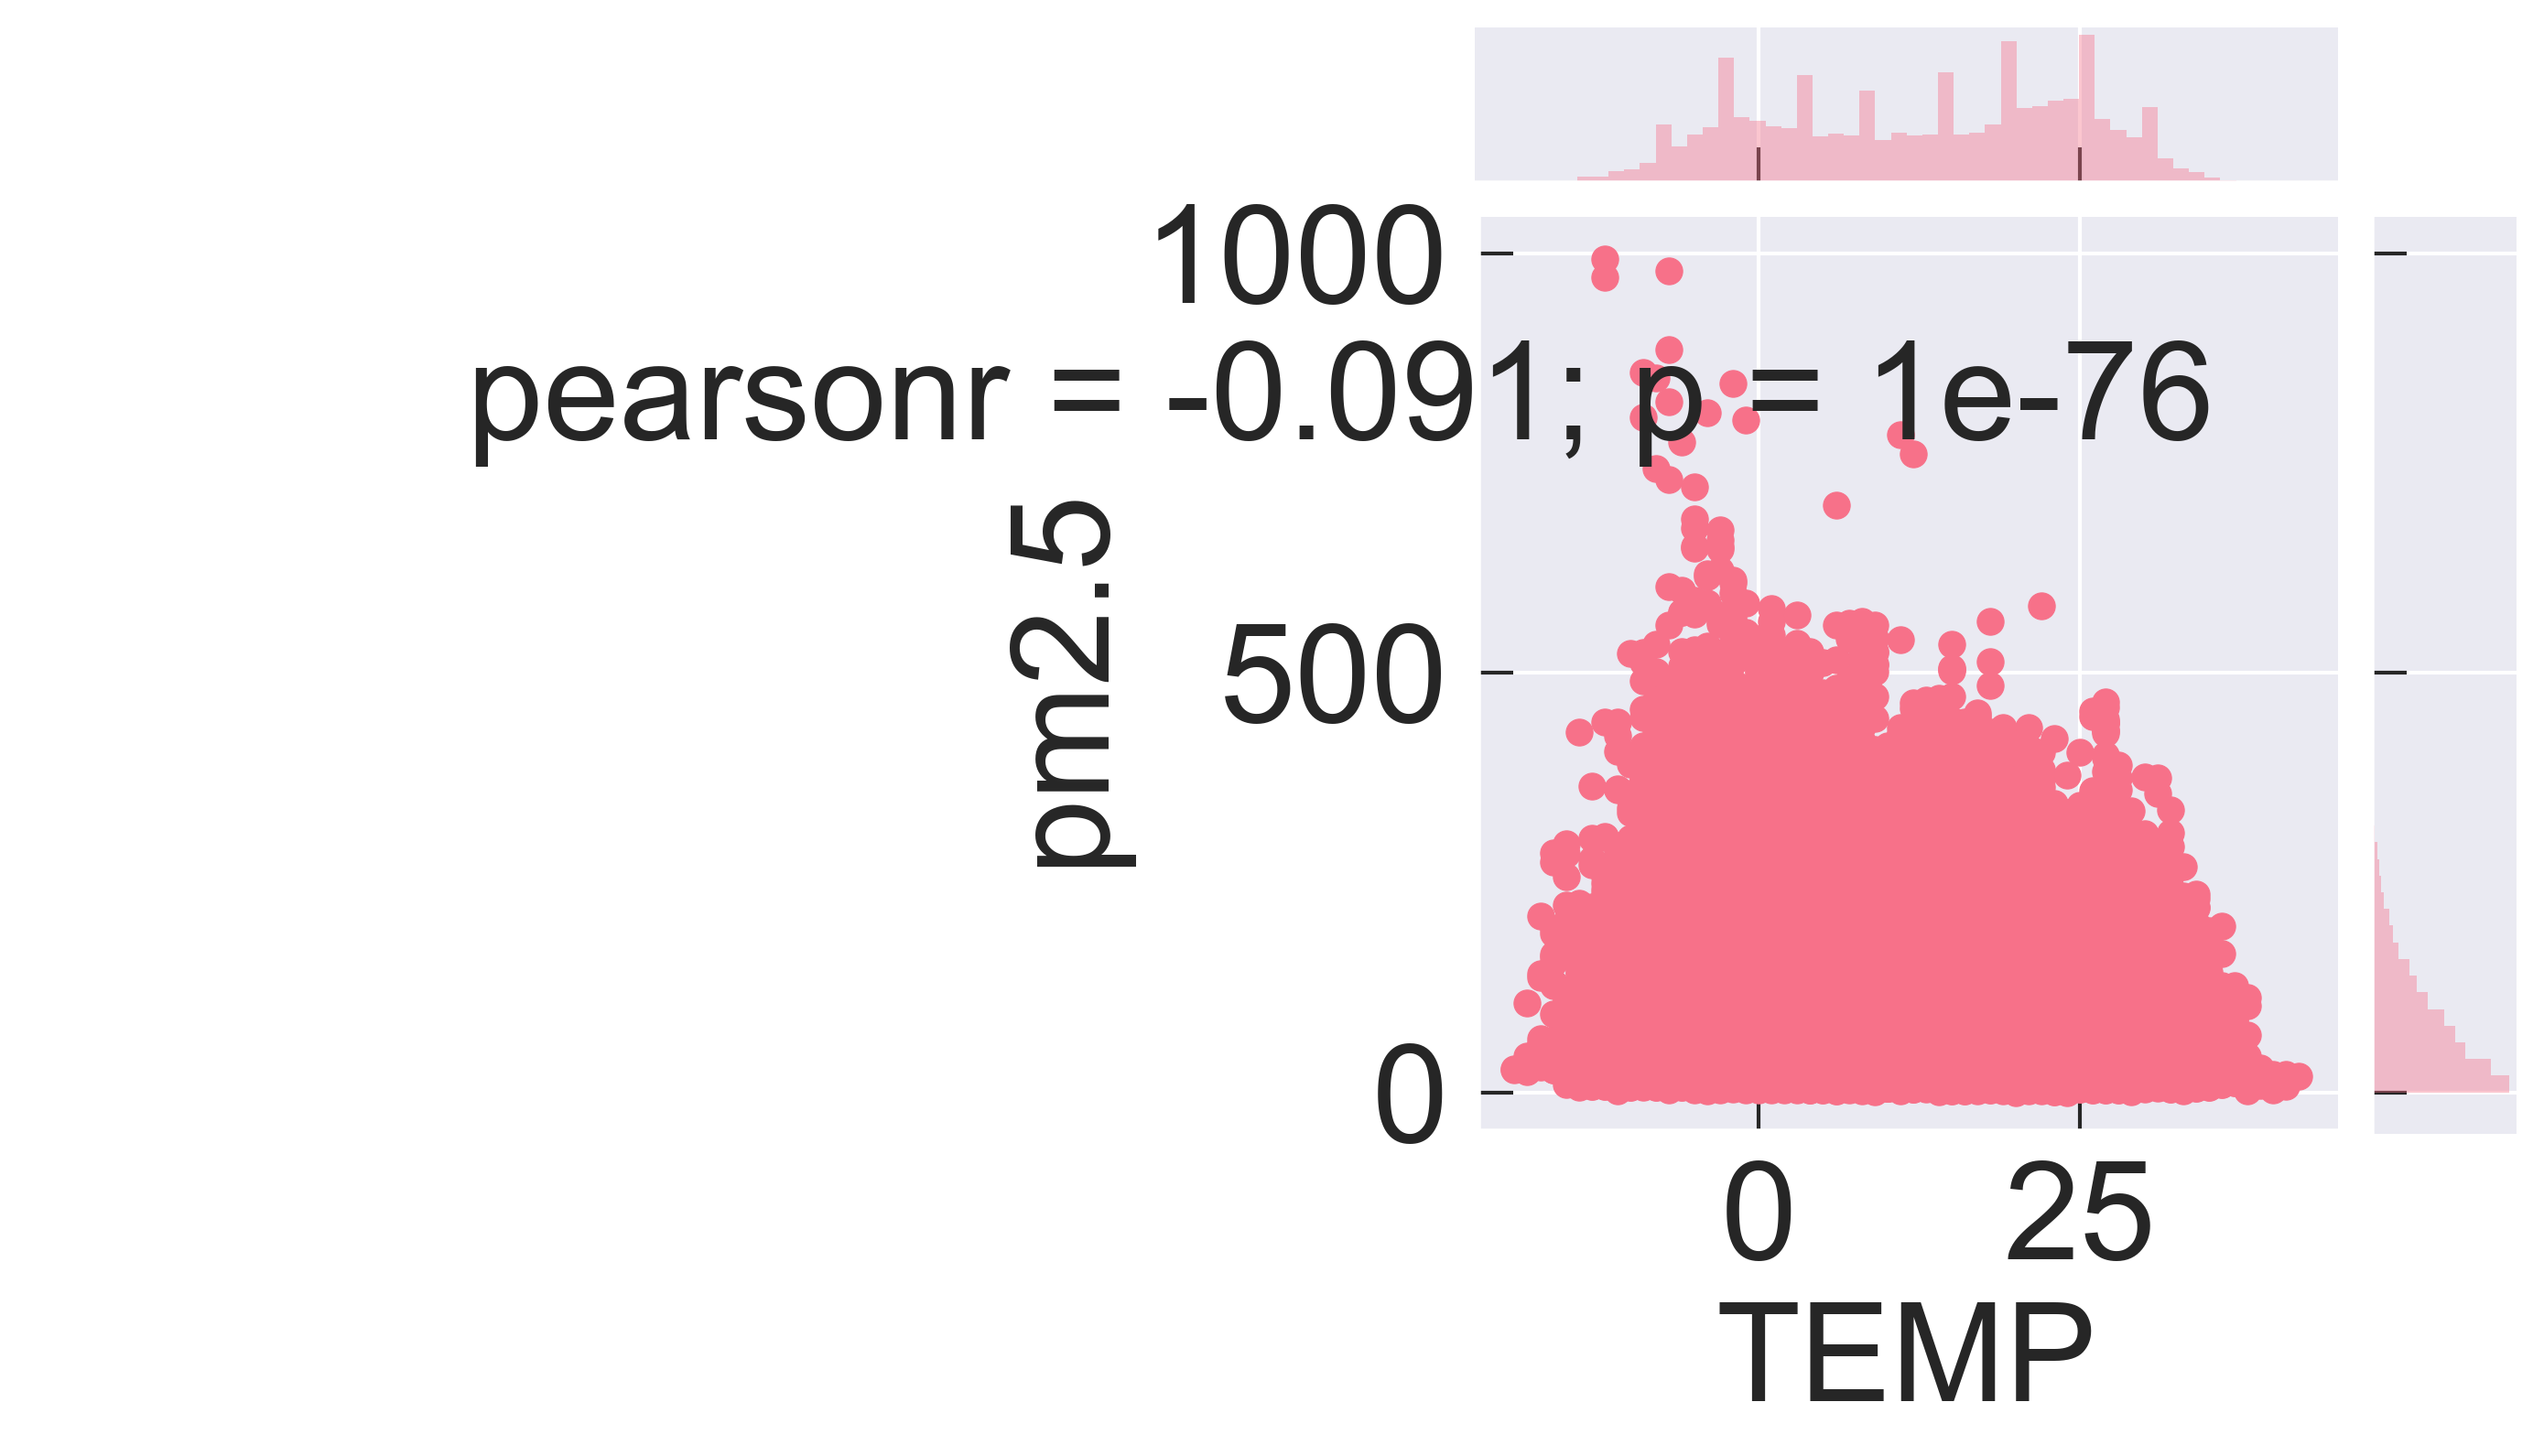

In [9]:
d = pm[pd.notnull(pm['pm2.5']) & pd.notnull(pm['TEMP'])]
sns.jointplot('TEMP', 'pm2.5', data = d, kind = 'scatter')

## GPS tracks
Download the GPS tracks dataset from 
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/GPS+Trajectories).

Read the two csvs `go_track_tracks.csv` and `go_track_trackspoints.csv`. 
The first one contains a list of GPS tracks, while the second file contains individual points in each GPS track. 

Determine:
1. The origin and destination of each vehicle.
2. The top speed of each vehicle (choose a suitable time interval, otherwise you will get a non-smooth velocity profile). 
3. The fraction of cars and buses (separately) that exceeded > 80km/hr velocity. 

In [5]:
import pandas as pd

In [3]:
tracks = pd.read_csv('data/gps_tracks/go_track_tracks.csv')

In [6]:
tracks.head()

,id,id_android,speed,time,distance,rating,rating_bus,rating_weather,car_or_bus,linha
0,1,0,19.210586,0.138049,2.652,3,0,0,1,NaN
1,2,0,30.848229,0.171485,5.290,3,0,0,1,NaN
2,3,1,13.560101,0.067699,0.918,3,0,0,2,NaN
3,4,1,19.766679,0.389544,7.700,3,0,0,2,NaN
4,8,0,25.807401,0.154801,3.995,2,0,0,1,NaN


In [12]:
points = pd.read_csv('data/gps_tracks/go_track_trackspoints.csv')
points.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


## Container in Sea
Download the datset at [http://data.deutschebahn.com/dataset/data-sensordaten-schenker-seefrachtcontainer](http://data.deutschebahn.com/dataset/data-sensordaten-schenker-seefrachtcontainer).
The dataset contains GPS traces from contains in Cargo ships. 

1. Plot the trajectories of each cargoship.
2. Compute the distance travelled in each day by each ship.
3. **(Extra challenge)** Visualize the trajectories on top of a world map by using `bokeh` or `plotly`.

In [1]:
from urllib import request
from io import StringIO

In [11]:
url = 'http://download-data.deutschebahn.com/static/datasets/sensordaten_schenker/161209_Schenker_Sensordaten.csv'
response = request.urlopen(url)
dat = response.read()
st = dat.decode('utf-8')

In [12]:
df = pd.read_csv(StringIO(st))
df.head()

,index,SXXJ number,Container,Date,Time_UTC,Latitude,Longitude,Accuracy,Active,Reverse,...,Door,Mount,Motion,GForce,Tilt,Temperature,Humidity,Light,Origin,Destination
0,#,[No],[No],[yyyy-MM-dd],[hh:mm:ss],[deg decimal],[deg decimal],[m],[1=yes|0=no],[1=yes|0=no],...,[1=open|0=closed],[1=not mounted|0=mounted],[1=motion|0=no motion],[g],[deg],[Celsius],[%],[Lux],[],[]
1,0,A,NONE,2016-08-08,14:39:36,NaN,NaN,NaN,0,0,...,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,A,NONE,2016-08-08,14:39:45,NaN,NaN,NaN,0,0,...,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,A,NONE,2016-08-08,14:40:34,25.794100,-80.369301,cellid,0,0,...,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,A,NONE,2016-08-08,15:57:46,NaN,NaN,NaN,1,0,...,0,0,0,0.000,NaN,29.800,75.700,NaN,NaN,NaN


In [13]:
df = df.iloc[1:]

In [14]:
df = df.loc[:, ['SXXJ number','Date', 'Time_UTC', 'Latitude', 'Longitude', 'Accuracy', 'Door',\
                'Temperature', 'Humidity']]
df.head()

,SXXJ number,Date,Time_UTC,Latitude,Longitude,Accuracy,Door,Temperature,Humidity
1,A,2016-08-08,14:39:36,NaN,NaN,NaN,1,NaN,NaN
2,A,2016-08-08,14:39:45,NaN,NaN,NaN,1,NaN,NaN
3,A,2016-08-08,14:40:34,25.794100,-80.369301,cellid,1,NaN,NaN
4,A,2016-08-08,15:57:46,NaN,NaN,NaN,0,29.800,75.700
5,A,2016-08-08,15:58:50,25.799700,-80.367302,cellid,0,29.900,73.000


In [26]:
pos = df[df['SXXJ number']=='A']

In [27]:
pos = pos[pd.notnull(pos['Latitude']) & pd.notnull(pos['Longitude'])]